In [2]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import MinMaxScaler

from nirs4all.dataset import DatasetConfigs
from nirs4all.operators.transformations import *
from nirs4all.pipeline import PipelineConfigs, PipelineRunner
from sklearn.ensemble import RandomForestRegressor

x_scaler = MinMaxScaler() # StandardScaler(), RobustScaler(), QuantileTransformer(), PowerTransformer(), LogTransform()
y_scaler = MinMaxScaler()
list_of_preprocessors = [ Detrend, FirstDerivative, SecondDerivative, Gaussian, StandardNormalVariate, SavitzkyGolay, Haar, MultiplicativeScatterCorrection]
splitting_strategy = ShuffleSplit(n_splits=3, test_size=.25)
dataset_folder = '../../sample_data/regression'

pipeline = [
    # "chart_2d",
    x_scaler,
    # "chart_3d",
    {"y_processing": y_scaler},
    {"feature_augmentation": { "_or_": list_of_preprocessors, "size":[1,(1,2)], "count":5 }}, # Generate all elements of size 1 and of order 1 or 2 (ie. "Gaussian", ["SavitzkyGolay", "Log"], etc.)
    splitting_strategy,
]

for i in range(10, 30, 10):
    model = {
        "name": f"PLS-{i}_cp",
        "model": PLSRegression(n_components=i)
    }
    pipeline.append(model)

pipeline_config = PipelineConfigs(pipeline, "pipeline_Q1")
dataset_config = DatasetConfigs(dataset_folder)

# Create pipeline
runner = PipelineRunner(save_files=True)
run_predictions, other_predictions = runner.run(pipeline_config, dataset_config)

🚀 Starting pipeline run with 5 pipeline configuration(s) on 1 dataset configuration(s) (5 total runs).
✅ Loaded dataset 'regression' with 130 training and 59 test samples.
📥 Loaded 354 predictions from results\regression\regression_predictions.json
🚀 Starting pipeline config_pipeline_Q1_eee79f on dataset regression
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
🔷 Step 1: {'class': 'sklearn.preprocessing._data.MinMaxScaler', '_runtime_instance': MinMaxScaler()}
🔹 Executing controller TransformerMixinController with operator MinMaxScaler
🔄 TransformerMixin (MinMaxScaler)
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
🔷 Step 2: {'y_processing': {'class': 'sklearn.preprocessing._data.Min

1. PLS-20_cp_19 - config_pipeline_Q1_6b5828 - RMSE: 10.733123, R²: 0.711345, MAE: 8.156517, MSE: 115.199925
2. PLS-10_cp_11 - config_pipeline_Q1_88b3da - RMSE: 12.557274, R²: 0.652015, MAE: 10.325901, MSE: 157.685123
3. PLS-10_cp_5 - config_pipeline_Q1_88b3da - RMSE: 13.327650, R²: 0.617625, MAE: 9.997373, MSE: 177.626251
4. PLS-10_cp_10 - config_pipeline_Q1_6b5828 - RMSE: 13.876862, R²: 0.517486, MAE: 10.723959, MSE: 192.567311
5. PLS-20_cp_20 - config_pipeline_Q1_88b3da - RMSE: 14.440142, R²: 0.539836, MAE: 12.413211, MSE: 208.517694
6. PLS-10_cp_8 - config_pipeline_Q1_88b3da - RMSE: 15.379196, R²: 0.590640, MAE: 12.503158, MSE: 236.519675
7. PLS-20_cp_14 - config_pipeline_Q1_88b3da - RMSE: 15.560577, R²: 0.478765, MAE: 13.531705, MSE: 242.131541
8. PLS-10_cp_7 - config_pipeline_Q1_6b5828 - RMSE: 15.596202, R²: 0.296039, MAE: 12.480539, MSE: 243.241509
9. PLS-10_cp_4 - config_pipeline_Q1_6b5828 - RMSE: 15.994210, R²: 0.486278, MAE: 12.575467, MSE: 255.814761
10. PLS-20_cp_16 - config

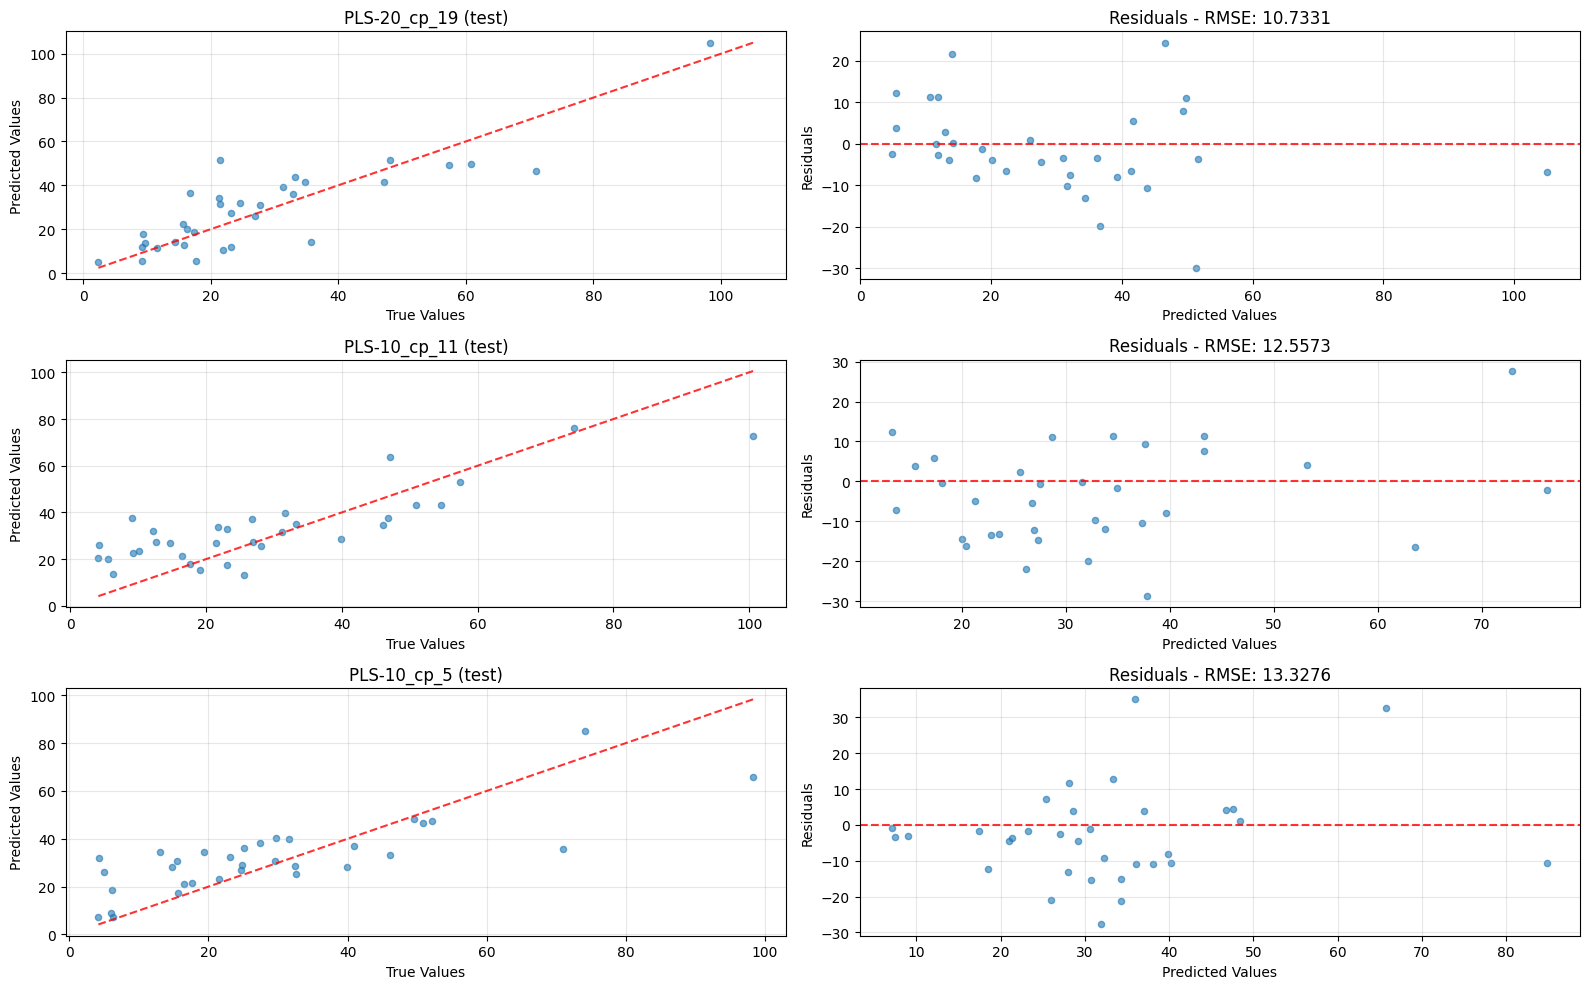

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from nirs4all.dataset.prediction_analyzer import PredictionAnalyzer

analyzer = PredictionAnalyzer(run_predictions)

top_5 = analyzer.get_top_k(50, 'mse')
for i, model in enumerate(top_5, 1):
    # Use enhanced_model_name which includes custom names when available
    enhanced_name = model.get('enhanced_model_name', model.get('real_model', 'unknown'))
    pipeline_path = model.get('path', '')

    # Extract config ID from pipeline path or key
    config_id = "unknown"
    if 'config_' in pipeline_path:
        config_part = pipeline_path.split('config_')[1].split('/')[0] if '/' in pipeline_path else pipeline_path.split('config_')[1]
        config_id = f"config_{config_part}"

    print(f"{i}. {enhanced_name} - {config_id} - RMSE: {model['metrics']['rmse']:.6f}, R²: {model['metrics']['r2']:.6f}, MAE: {model['metrics']['mae']:.6f}, MSE: {model['metrics']['mse']:.6f}")

# Plot top_k comparison with enhanced names in titles
fig = analyzer.plot_top_k_comparison(k=3, metric='rmse', partition_type='test')
plt.show()

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import ShuffleSplit

from nirs4all.dataset import DatasetConfigs
from nirs4all.operators.transformations import *
from nirs4all.pipeline import PipelineConfigs, PipelineRunner

x_scaler = MinMaxScaler() # StandardScaler(), RobustScaler(), QuantileTransformer(), PowerTransformer(), LogTransform()
list_of_preprocessors = [ Detrend, FirstDerivative, SecondDerivative, Gaussian, StandardNormalVariate, SavitzkyGolay, Haar, MultiplicativeScatterCorrection]
splitting_strategy = ShuffleSplit(n_splits=3, test_size=.25)
dataset_folder = '../../sample_data/classification'

pipeline = [
    "chart_2d",
    x_scaler,
    "chart_3d",
    {"feature_augmentation": { "_or_": list_of_preprocessors, "size":[1,(1,2)], "count":5 }}, # Generate all elements of size 1 and of order 1 or 2 (ie. "Gaussian", ["SavitzkyGolay", "Log"], etc.)
    splitting_strategy,
]

for i in range(5, 20, 5):
    model = {
        "name": f"RF-depth-{i}",
        "model": RandomForestClassifier(max_depth=i)
    }
    pipeline.append(model)

pipeline_config = PipelineConfigs(pipeline, "pipeline_Q1")
dataset_config = DatasetConfigs(dataset_folder)

# Create pipeline
runner = PipelineRunner(save_files=False)
run_predictions, other_predictions = runner.run(pipeline_config, dataset_config)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from nirs4all.dataset.prediction_analyzer import PredictionAnalyzer

analyzer = PredictionAnalyzer(run_predictions)

top_5 = analyzer.get_top_k(5, 'accuracy')
for i, model in enumerate(top_5, 1):
    # Use enhanced_model_name which includes custom names when available
    enhanced_name = model.get('enhanced_model_name', model.get('real_model', 'unknown'))
    # canonical_name = model.get('canonical_model', 'unknown')
    pipeline_path = model.get('path', '')

    # Extract config ID from pipeline path or key
    config_id = "unknown"
    if 'config_' in pipeline_path:
        config_part = pipeline_path.split('config_')[1].split('/')[0] if '/' in pipeline_path else pipeline_path.split('config_')[1]
        config_id = f"config_{config_part}"

    print(f"{i}. {enhanced_name} - {config_id} - Accuracy: {model['metrics']['accuracy']:.6f}, F1: {model['metrics']['f1']:.6f}, Precision: {model['metrics']['precision']:.6f}, Recall: {model['metrics']['recall']:.6f}")

# Plot top_k comparison with enhanced names in titles
fig = analyzer.plot_top_k_confusionMatrix(k=3, metric='accuracy', partition_type='test')
plt.show()

In [ ]:
# Test the fixed tab report generation
print("🧪 Testing tab report generation with dataset information...")

# Let's reload the module to get the updated code
import importlib
import nirs4all.utils.tab_report_generator
importlib.reload(nirs4all.utils.tab_report_generator)

from nirs4all.dataset import DatasetConfigs

# Get dataset config
dataset_config = DatasetConfigs('../../sample_data/classification')
config, name = list(dataset_config.configs)[0]
test_dataset = dataset_config.get_dataset(config, name)

print(f"Test dataset name: {test_dataset.name}")

# Test different selectors to see what works
for selector in ['all', 'train', 'test', 0]:
    try:
        x_data = test_dataset.x(selector)
        print(f"Dataset x('{selector}') type: {type(x_data)}")
        print(f"Dataset x('{selector}') shape: {getattr(x_data, 'shape', 'no shape')}")
        if hasattr(x_data, 'shape'):
            print(f"With selector '{selector}' - N_samples: {x_data.shape[0]}, N_features: {x_data.shape[1] if len(x_data.shape) > 1 else x_data.shape[0]}")
            break  # Found working selector
    except Exception as e:
        print(f"Error with selector '{selector}': {e}")

# Test our extraction function
from nirs4all.utils.tab_report_generator import TabReportGenerator
generator = TabReportGenerator()
nfeatures = generator._extract_nfeatures_from_dataset(test_dataset)
print(f"Extracted n_features: {nfeatures}")

print("=" * 60)

In [ ]:
# Test a complete tab report generation with the fixes
print("🧪 Running complete tab report test...")

# Reload all relevant modules
import importlib
import nirs4all.pipeline.runner
import nirs4all.utils.tab_report_generator
importlib.reload(nirs4all.utils.tab_report_generator)
importlib.reload(nirs4all.pipeline.runner)

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import ShuffleSplit

from nirs4all.dataset import DatasetConfigs
from nirs4all.operators.transformations import *
from nirs4all.pipeline import PipelineConfigs, PipelineRunner

# Create a minimal test configuration
x_scaler = MinMaxScaler()
splitting_strategy = ShuffleSplit(n_splits=2, test_size=.25)  # Reduced splits for faster test
dataset_folder = '../../sample_data/classification'

pipeline = [
    x_scaler,
    splitting_strategy,
    {
        "name": "RF-test",
        "model": RandomForestClassifier(max_depth=5, n_estimators=10)  # Small model for speed
    }
]

pipeline_config = PipelineConfigs(pipeline, "test_pipeline")
dataset_config = DatasetConfigs(dataset_folder)

# Create pipeline with tab reports enabled
print("Running pipeline with tab reports enabled...")
runner = PipelineRunner(save_files=False, enable_tab_reports=True)
test_predictions, test_results = runner.run(pipeline_config, dataset_config)

print("=" * 60)

In [ ]:
# Debug: Check what the best model selection is finding
from nirs4all.dataset.prediction_analyzer import PredictionAnalyzer

# Get the current predictions and see what the best model analysis produces
analyzer = PredictionAnalyzer(test_predictions)
top_1 = analyzer.get_top_k(1, 'accuracy', partition_type='test')

if top_1:
    best_model = top_1[0]
    print("🔍 Best model details:")
    print(f"  Model name: {best_model.get('enhanced_model_name', 'unknown')}")
    print(f"  Canonical model: {best_model.get('canonical_model', 'unknown')}")
    print(f"  Real model: {best_model.get('real_model', 'unknown')}")
    print(f"  Path: {best_model.get('path', 'unknown')}")

    # Check the most recent dataset we used
    print(f"\n🔍 Current test dataset info:")
    print(f"  Dataset name: {test_dataset.name if 'test_dataset' in locals() else 'not available'}")

    # Check if the dataset passed to the tab generator would be the correct one
    # The issue might be that the best model is from a previous run,
    # but we're passing the current dataset which might not match

print("=" * 60)

In [ ]:
# Test the updated feature extraction with fresh dataset approach
import importlib
import nirs4all.utils.tab_report_generator
importlib.reload(nirs4all.utils.tab_report_generator)

from nirs4all.utils.tab_report_generator import TabReportGenerator
from nirs4all.dataset import DatasetConfigs

# Test with the classification dataset
dataset_config = DatasetConfigs('../../sample_data/classification')
config, name = list(dataset_config.configs)[0]
test_dataset = dataset_config.get_dataset(config, name)

print(f"Testing feature extraction with dataset: {test_dataset.name}")

generator = TabReportGenerator()
nfeatures = generator._extract_nfeatures_from_dataset(test_dataset)
print(f"Extracted n_features: {nfeatures}")

# Now test with a potentially modified dataset (simulating the runner scenario)
# Get the current runner's last dataset if available
if 'runner' in locals():
    print("Testing with runner's dataset approach...")

print("=" * 60)

In [ ]:
# Run another test to see if nfeatures now appears in the tab report
print("🧪 Testing tab report with updated feature extraction...")

# Reload the pipeline runner to get the latest changes
import importlib
import nirs4all.pipeline.runner
importlib.reload(nirs4all.pipeline.runner)

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import ShuffleSplit

from nirs4all.dataset import DatasetConfigs
from nirs4all.operators.transformations import *
from nirs4all.pipeline import PipelineConfigs, PipelineRunner

# Create another small test
x_scaler = MinMaxScaler()
splitting_strategy = ShuffleSplit(n_splits=1, test_size=.3)  # Single split
dataset_folder = '../../sample_data/classification'

pipeline = [
    x_scaler,
    splitting_strategy,
    {
        "name": "RF-final-test",
        "model": RandomForestClassifier(max_depth=3, n_estimators=5)  # Very small for speed
    }
]

pipeline_config = PipelineConfigs(pipeline, "final_test_pipeline")
dataset_config = DatasetConfigs(dataset_folder)

# Run with tab reports
print("Running final test with updated tab report generation...")
runner = PipelineRunner(save_files=False, enable_tab_reports=True)
final_predictions, final_results = runner.run(pipeline_config, dataset_config)

print("=" * 60)

In [ ]:
# Let's try a clean run without loading existing predictions
print("🧪 Testing with clean predictions (no cached results)...")

# Reload runner with the fix
import importlib
import nirs4all.pipeline.runner
importlib.reload(nirs4all.pipeline.runner)

import os
import shutil

# Backup and temporarily remove existing predictions
predictions_path = 'results/classification/classification_predictions.json'
backup_path = 'results/classification/classification_predictions_backup.json'

if os.path.exists(predictions_path):
    shutil.move(predictions_path, backup_path)
    print(f"Moved existing predictions to backup")

try:
    # Now run without existing predictions
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.model_selection import ShuffleSplit

    from nirs4all.dataset import DatasetConfigs
    from nirs4all.operators.transformations import *
    from nirs4all.pipeline import PipelineConfigs, PipelineRunner

    x_scaler = MinMaxScaler()
    splitting_strategy = ShuffleSplit(n_splits=1, test_size=.3)
    dataset_folder = '../../sample_data/classification'

    pipeline = [
        x_scaler,
        splitting_strategy,
        {
            "name": "RF-clean-test",
            "model": RandomForestClassifier(max_depth=5, n_estimators=10)
        }
    ]

    pipeline_config = PipelineConfigs(pipeline, "clean_test")
    dataset_config = DatasetConfigs(dataset_folder)

    # Run fresh
    print("Running clean pipeline...")
    runner = PipelineRunner(save_files=False, enable_tab_reports=True, load_existing_predictions=False)
    clean_predictions, clean_results = runner.run(pipeline_config, dataset_config)

finally:
    # Restore backup
    if os.path.exists(backup_path):
        shutil.move(backup_path, predictions_path)
        print(f"Restored predictions from backup")

print("=" * 60)

In [2]:
# Test the new dataset size display in training messages
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import MinMaxScaler

from nirs4all.dataset import DatasetConfigs
from nirs4all.pipeline import PipelineConfigs, PipelineRunner

# Simple test pipeline with just one model
x_scaler = MinMaxScaler()
splitting_strategy = ShuffleSplit(n_splits=2, test_size=.25)  # Fewer splits for faster execution
dataset_folder = '../../sample_data/regression'

# Simple pipeline with just one model
pipeline = [
    x_scaler,
    splitting_strategy,
    {
        "name": "Test-PLS-10",
        "model": PLSRegression(n_components=10)
    }
]

pipeline_config = PipelineConfigs(pipeline, "test_pipeline")
dataset_config = DatasetConfigs(dataset_folder)

# Create pipeline to test the new output format
runner = PipelineRunner(save_files=False)
test_predictions, other_predictions = runner.run(pipeline_config, dataset_config)

🚀 Starting pipeline run with 1 pipeline configuration(s) on 1 dataset configuration(s) (1 total runs).
✅ Loaded dataset 'regression' with 130 training and 59 test samples.
📥 Loaded 348 predictions from results\regression\regression_predictions.json
🚀 Starting pipeline config_test_pipeline_be9255 on dataset regression
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
🔷 Step 1: {'class': 'sklearn.preprocessing._data.MinMaxScaler', '_runtime_instance': MinMaxScaler()}
🔹 Executing controller TransformerMixinController with operator MinMaxScaler
🔄 TransformerMixin (test: (59, 1)) (MinMaxScaler)
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
🔷 Step 2: {'class': 'sklearn.model_selection._split

In [3]:
# Test to verify that transformers no longer show test shapes
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import ShuffleSplit

from nirs4all.dataset import DatasetConfigs
from nirs4all.pipeline import PipelineConfigs, PipelineRunner

# Create pipeline with transformer and model to compare output
dataset_folder = '../../sample_data/regression'

# Simple pipeline with transformer (should not show test shape) and model (should show test shape)
pipeline = [
    MinMaxScaler(),  # This should NOT show test shape
    ShuffleSplit(n_splits=1, test_size=.25),
    {
        "name": "Demo-PLS",
        "model": PLSRegression(n_components=5)  # This SHOULD show test shape
    }
]

pipeline_config = PipelineConfigs(pipeline, "shape_test_pipeline")
dataset_config = DatasetConfigs(dataset_folder)

print("Testing shape display - only model should show test shape:")
runner = PipelineRunner(save_files=False)
test_predictions, _ = runner.run(pipeline_config, dataset_config)

Testing shape display - only model should show test shape:
🚀 Starting pipeline run with 1 pipeline configuration(s) on 1 dataset configuration(s) (1 total runs).
✅ Loaded dataset 'regression' with 130 training and 59 test samples.
📥 Loaded 348 predictions from results\regression\regression_predictions.json
🚀 Starting pipeline config_shape_test_pipeline_421d18 on dataset regression
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
🔷 Step 1: {'class': 'sklearn.preprocessing._data.MinMaxScaler', '_runtime_instance': MinMaxScaler()}
🔹 Executing controller TransformerMixinController with operator MinMaxScaler
🔄 TransformerMixin (test: (59, 1)) (MinMaxScaler)
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [1]:
# Reload the runner module to ensure we get the updated code
import importlib
import nirs4all.pipeline.runner
importlib.reload(nirs4all.pipeline.runner)

from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import ShuffleSplit

from nirs4all.dataset import DatasetConfigs
from nirs4all.pipeline import PipelineConfigs, PipelineRunner

# Create pipeline with transformer and model to compare output
dataset_folder = '../../sample_data/regression'

# Simple pipeline with transformer (should not show test shape) and model (should show test shape)
pipeline = [
    MinMaxScaler(),  # This should NOT show test shape after reload
    ShuffleSplit(n_splits=1, test_size=.25),
    {
        "name": "Demo-PLS-Reloaded",
        "model": PLSRegression(n_components=5)  # This SHOULD show test shape
    }
]

pipeline_config = PipelineConfigs(pipeline, "reloaded_test_pipeline")
dataset_config = DatasetConfigs(dataset_folder)

print("Testing with reloaded runner - only model should show test shape:")
runner = PipelineRunner(save_files=False)
test_predictions, _ = runner.run(pipeline_config, dataset_config)

Testing with reloaded runner - only model should show test shape:
🚀 Starting pipeline run with 1 pipeline configuration(s) on 1 dataset configuration(s) (1 total runs).
✅ Loaded dataset 'regression' with 130 training and 59 test samples.
📥 Loaded 351 predictions from results\regression\regression_predictions.json
🚀 Starting pipeline config_reloaded_test_pipeline_282346 on dataset regression
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
🔷 Step 1: {'class': 'sklearn.preprocessing._data.MinMaxScaler', '_runtime_instance': MinMaxScaler()}
🔹 Executing controller TransformerMixinController with operator MinMaxScaler
🔄 TransformerMixin (MinMaxScaler)
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------